<a href="https://colab.research.google.com/github/candrajulius/Classifcation_Nut_With_InceptionV3_And_Xception/blob/main/Classification_Nut_Use_Inception_V3_And_Xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mengecek GPU
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
# Import beberapa modul untuk digunakan
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import zipfile,os,shutil
from PIL import Image
import matplotlib.image as mpimg
from zipfile import ZipFile
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.callbacks import ModelCheckpoint

import pandas as pd

In [3]:
# Install Data From Kaggle
!pip install -q kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"candrajuliussinaga","key":"f1b5e10673fde9255b882ba2af119a93"}'}

In [5]:
# Make directory & Change Permission Kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [6]:
# Download Dataset From kaggle
!kaggle datasets download -d ruopengan/11-common-nut-types-for-image-classification

100% 4.36G/4.36G [03:59<00:00, 22.9MB/s]
100% 4.36G/4.36G [03:59<00:00, 19.6MB/s]


In [7]:
# Extrak ZIP From Kaggle
file_name = '/content/11-common-nut-types-for-image-classification.zip'
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Selesai mengekstrak zip')

Selesai mengekstrak zip


In [8]:
# Mendefinisikan direktori utama dataset yang digunakan
base_dir = '/content/Nuts/Nuts/train'

In [9]:
# Menghitung jumlah gambar pada dataset
number_label = {}
total_files = 0
for i in os.listdir(base_dir):
  counting = len(os.listdir(os.path.join(base_dir,i)))
  number_label[i] = counting
  total_files += counting
  print('Total Files: ',str(total_files))
print('Jumlah semua file yang ada pada dataset : ',str(total_files))

Total Files:  120
Total Files:  240
Total Files:  360
Total Files:  480
Total Files:  600
Total Files:  720
Total Files:  840
Total Files:  960
Total Files:  1080
Total Files:  1200
Total Files:  1320
Jumlah semua file yang ada pada dataset :  1320


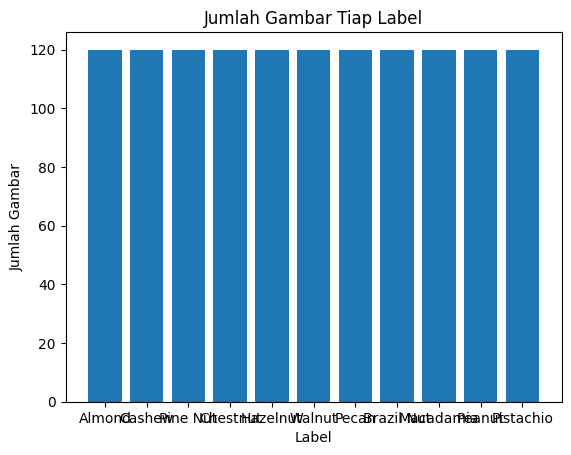

In [10]:
plt.bar(number_label.keys(), number_label.values());
plt.title("Jumlah Gambar Tiap Label");
plt.xlabel('Label');
plt.ylabel('Jumlah Gambar');

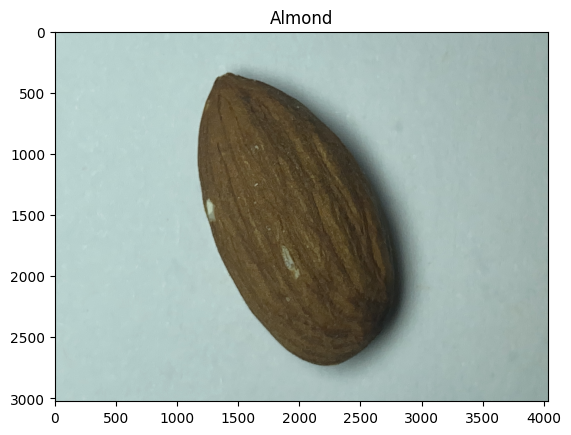

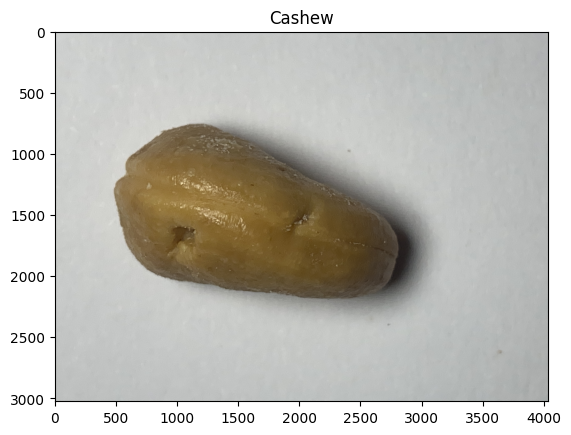

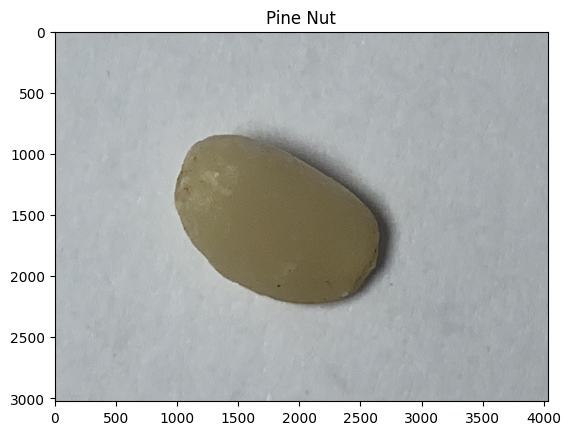

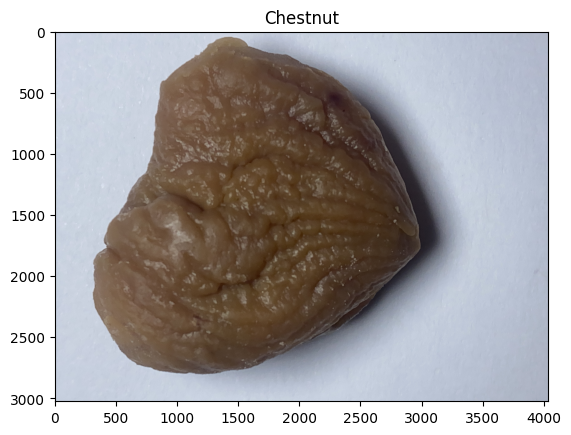

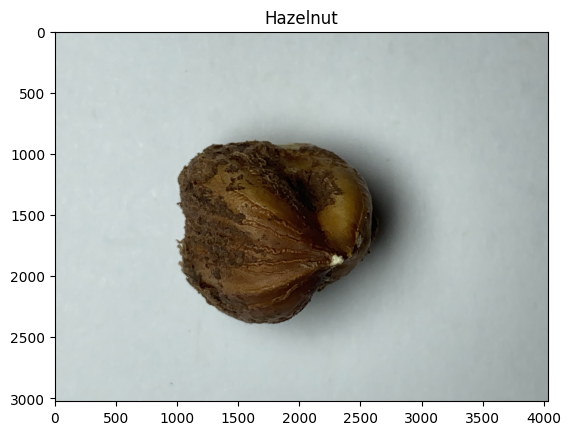

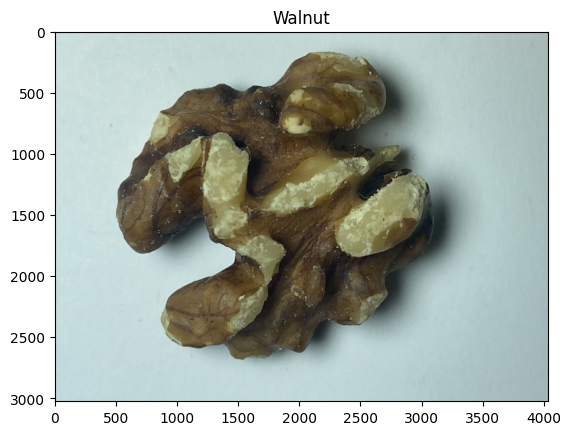

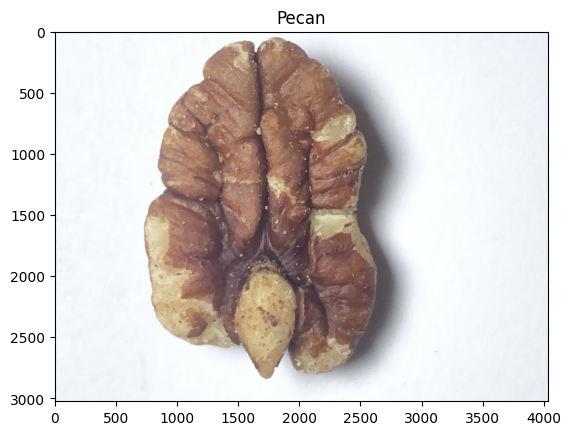

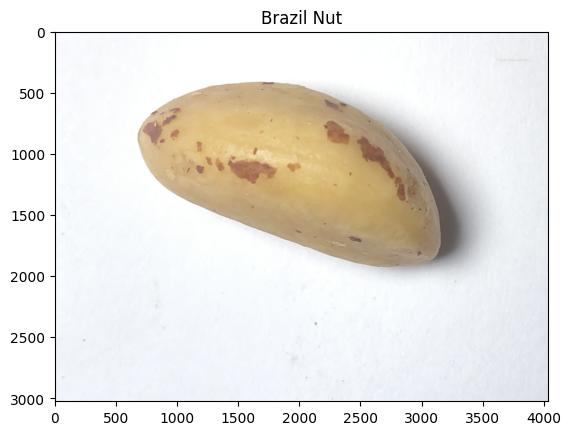

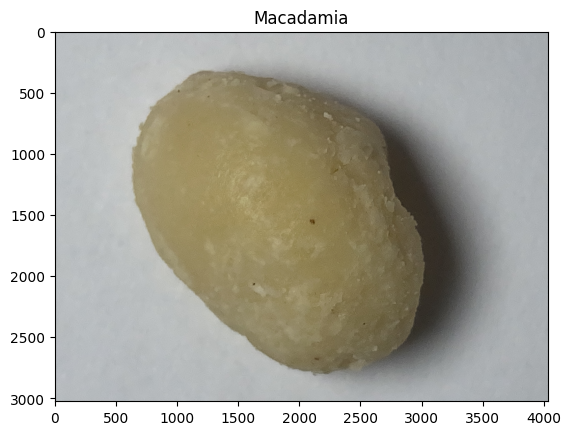

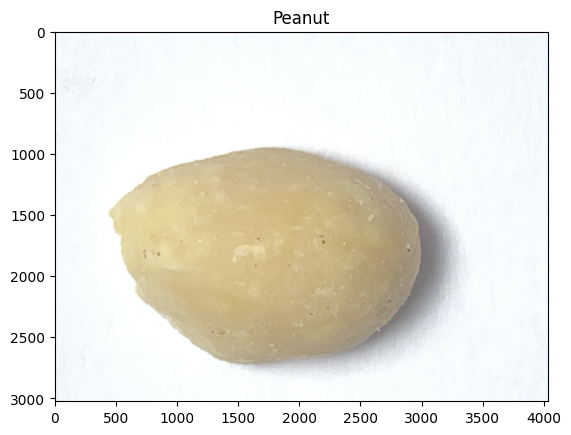

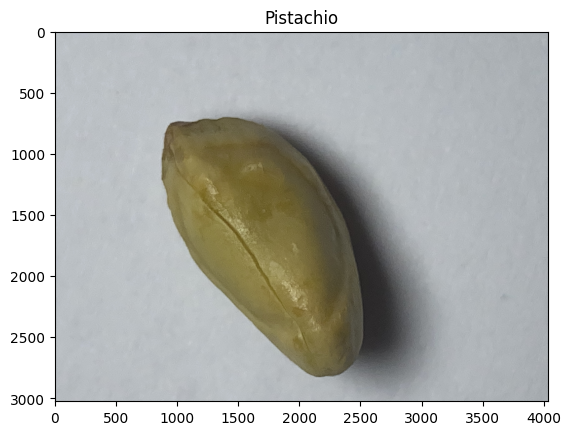

In [11]:
# Menampilkan sampel gambar tiap kelas
import matplotlib.image as mpimg

img_each_class = 1
img_samples = {}
classes = list(number_label.keys())


for c in classes:
    temp = os.listdir(os.path.join(base_dir, c))[:img_each_class]
    for item in temp:
        img_path = os.path.join(base_dir, c, item)
        img_samples[c] = img_path

for i in img_samples:
    fig = plt.gcf()
    img = mpimg.imread(img_samples[i])
    plt.title(i)
    plt.imshow(img)
    plt.show()

In [12]:
# Membuat directory train dan val stelah itu menggabungkan setiap direktori kedalam train dan val
# lalu membuat sub direktori
train = 'train'
val = 'val'
base_dir_content = '/content/Nuts'
train_dir = os.path.join(base_dir_content,train)
validation_dir = os.path.join(base_dir_content,val)

almond_dir = os.path.join(base_dir,'Almond')
brazi_nut_dir = os.path.join(base_dir,'Brazil Nut')
cashew_dir = os.path.join(base_dir,'Cashew')
chestnut_dir = os.path.join(base_dir,'Chestnut')
hazelnut_dir = os.path.join(base_dir,'Hazelnut')
macademia_dir = os.path.join(base_dir,'Macadamia')
peanut_dir = os.path.join(base_dir,'Peanut')
pecan_dir = os.path.join(base_dir,'Pecan')
pine_nut_dir = os.path.join(base_dir,'Pine Nut')
pistachio_dir = os.path.join(base_dir,'Pistachio')
walnut_dir = os.path.join(base_dir,'Walnut')



In [13]:
# Mentraining data yang ada di subdirektori
print('total training Almond images ', len(os.listdir(almond_dir)))
print('total training Brazil Nut images ', len(os.listdir(brazi_nut_dir)))
print('total training Cashew images ', len(os.listdir(cashew_dir)))
print('total training Chestnut images ', len(os.listdir(chestnut_dir)))
print('total training Hazelnut images ', len(os.listdir(hazelnut_dir)))
print('total training Macadamia images ', len(os.listdir(macademia_dir)))
print('total training Peanut images ', len(os.listdir(peanut_dir)))
print('total training Pecan images ', len(os.listdir(pecan_dir)))
print('total training Pine Nut images ', len(os.listdir(pine_nut_dir)))
print('total training Pistachio images ', len(os.listdir(pistachio_dir)))
print('total training Walnut images ', len(os.listdir(walnut_dir)))

total training Almond images  120
total training Brazil Nut images  120
total training Cashew images  120
total training Chestnut images  120
total training Hazelnut images  120
total training Macadamia images  120
total training Peanut images  120
total training Pecan images  120
total training Pine Nut images  120
total training Pistachio images  120
total training Walnut images  120


In [14]:
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [15]:
train_almond = os.path.join(train_dir,'Almond')
train_brazil_nut = os.path.join(train_dir,'Brazil Nut')
train_cashew = os.path.join(train_dir,'Cashew')
train_chestnut = os.path.join(train_dir,'Chestnut')
train_hazelnut = os.path.join(train_dir,'Hazelnut')
train_macadamia = os.path.join(train_dir,'Macadamia')
train_peanut = os.path.join(train_dir,'Peanut')
train_pecan = os.path.join(train_dir,'Pecan')
train_pine_nut = os.path.join(train_dir,'Pine Nut')
train_pistachio = os.path.join(train_dir,'Pistachio')
train_walnut = os.path.join(train_dir,'Walnut')

In [16]:
os.mkdir(train_almond)
os.mkdir(train_brazil_nut)
os.mkdir(train_cashew)
os.mkdir(train_chestnut)
os.mkdir(train_hazelnut)
os.mkdir(train_macadamia)
os.mkdir(train_peanut)
os.mkdir(train_pecan)
os.mkdir(train_pine_nut)
os.mkdir(train_pistachio)
os.mkdir(train_walnut)

In [17]:
# Memecah setiap direktori menjadi data train dan data validasi(validation 40% of dataset)
train_almond_dir, val_almond_dir = train_test_split(os.listdir(almond_dir),test_size=0.40)
train_brazil_nut_dir, val_brazil_nut_dir = train_test_split(os.listdir(brazi_nut_dir),test_size=0.40)
train_cashew_nut_dir, val_cashew_nut_dir = train_test_split(os.listdir(cashew_dir),test_size=0.40)
train_chestnut_dir, val_chestnut_dir = train_test_split(os.listdir(chestnut_dir),test_size=0.40)
train_hazelnut_dir, val_hazelnut_dir = train_test_split(os.listdir(hazelnut_dir),test_size=0.40)
train_macadamia_dir, val_macadamia_dir = train_test_split(os.listdir(macademia_dir),test_size=0.40)
train_peanut_dir, val_peanut_dir = train_test_split(os.listdir(peanut_dir),test_size=0.40)
train_pecan_dir, val_pecan_dir = train_test_split(os.listdir(pecan_dir),test_size=0.40)
train_pine_nut_dir, val_pine_nut_dir = train_test_split(os.listdir(pine_nut_dir),test_size=0.40)
train_pistachio_dir, val_pistachio_dir = train_test_split(os.listdir(pistachio_dir),test_size=0.40)
train_walnut_dir, val_walnut_dir = train_test_split(os.listdir(walnut_dir),test_size=0.40)

In [18]:
val_almond = os.path.join(validation_dir,'Almond')
val_brazil_nut = os.path.join(validation_dir,'Brazil Nut')
val_cashew = os.path.join(validation_dir,'Cashew')
val_chestnut = os.path.join(validation_dir,'Chestnut')
val_hazelnut = os.path.join(validation_dir,'Hazelnut')
val_macadamia = os.path.join(validation_dir,'Macadamia')
val_peanut = os.path.join(validation_dir,'Peanut')
val_pecan = os.path.join(validation_dir,'Pecan')
val_pine_nut = os.path.join(validation_dir,'Pine Nut')
val_pistachio = os.path.join(validation_dir,'Pistachio')
val_walnut = os.path.join(validation_dir,'Walnut')

In [19]:
os.mkdir(val_almond)
os.mkdir(val_brazil_nut)
os.mkdir(val_cashew)
os.mkdir(val_chestnut)
os.mkdir(val_hazelnut)
os.mkdir(val_macadamia)
os.mkdir(val_peanut)
os.mkdir(val_pecan)
os.mkdir(val_pine_nut)
os.mkdir(val_pistachio)
os.mkdir(val_walnut)

In [20]:
# Mengcopy file yang datanya sudah di train dan divalidasi kedalam sebuah directori baru Train
for file in train_almond_dir:
  shutil.copy(os.path.join(almond_dir,file),os.path.join(train_almond,file))
for file in train_brazil_nut_dir:
  shutil.copy(os.path.join(brazi_nut_dir,file),os.path.join(train_brazil_nut,file))
for file in train_cashew_nut_dir:
  shutil.copy(os.path.join(cashew_dir,file),os.path.join(train_cashew,file))
for file in train_chestnut_dir:
  shutil.copy(os.path.join(chestnut_dir,file),os.path.join(train_chestnut,file))
for file in train_hazelnut_dir:
  shutil.copy(os.path.join(hazelnut_dir,file),os.path.join(train_hazelnut,file))
for file in train_macadamia_dir:
  shutil.copy(os.path.join(macademia_dir,file),os.path.join(train_macadamia,file))
for file in train_peanut_dir:
  shutil.copy(os.path.join(peanut_dir,file),os.path.join(train_peanut,file))
for file in train_pecan_dir:
  shutil.copy(os.path.join(pecan_dir,file),os.path.join(train_pecan,file))
for file in train_pine_nut_dir:
  shutil.copy(os.path.join(pine_nut_dir,file),os.path.join(train_pine_nut,file))
for file in train_pistachio_dir:
  shutil.copy(os.path.join(pistachio_dir,file),os.path.join(train_pistachio,file))
for file in train_walnut_dir:
  shutil.copy(os.path.join(walnut_dir,file),os.path.join(train_walnut,file))

# Mengcopy file yang datanya sudah di train dan divalidasi kedalam sebuah directori baru Val
for file in val_almond_dir:
  shutil.copy(os.path.join(almond_dir,file),os.path.join(val_almond))
for file in val_brazil_nut_dir:
  shutil.copy(os.path.join(brazi_nut_dir,file),os.path.join(val_brazil_nut))
for file in val_cashew_nut_dir:
  shutil.copy(os.path.join(cashew_dir,file),os.path.join(val_cashew))
for file in val_chestnut_dir:
  shutil.copy(os.path.join(chestnut_dir,file),os.path.join(val_chestnut))
for file in val_hazelnut_dir:
  shutil.copy(os.path.join(hazelnut_dir,file),os.path.join(val_hazelnut))
for file in val_macadamia_dir:
  shutil.copy(os.path.join(macademia_dir,file),os.path.join(val_macadamia))
for file in val_peanut_dir:
  shutil.copy(os.path.join(peanut_dir,file),os.path.join(val_peanut))
for file in val_pecan_dir:
  shutil.copy(os.path.join(pecan_dir,file),os.path.join(val_pecan))
for file in val_pine_nut_dir:
  shutil.copy(os.path.join(pine_nut_dir,file),os.path.join(val_pine_nut))
for file in val_pistachio_dir:
  shutil.copy(os.path.join(pistachio_dir,file),os.path.join(val_pistachio))
for file in val_walnut_dir:
  shutil.copy(os.path.join(walnut_dir,file),os.path.join(val_walnut))

In [21]:
# Image Processing
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
)
test_datagen = ImageDataGenerator(
    rescale = 1./225
)

In [22]:
training_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300,300),
    batch_size= 32,
    class_mode='categorical'
)

validasi_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (300,300),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 792 images belonging to 11 classes.
Found 528 images belonging to 11 classes.


In [23]:
from tensorflow.keras.layers import Input
from keras.applications.xception import Xception
from keras.applications.inception_v3 import InceptionV3
# model = tf.keras.models.Sequential([
#      tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu',input_shape=(256, 256, 3)),
#     tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
#     tf.keras.layers.MaxPool2D(pool_size=(2,2)),
#     tf.keras.layers.BatchNormalization(axis=-1),

#     tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
#     tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
#     tf.keras.layers.MaxPool2D(pool_size=(2,2)),
#     tf.keras.layers.BatchNormalization(axis=-1),

#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(512,activation='relu'),
#     tf.keras.layers.BatchNormalization() ,
#     tf.keras.layers.Dropout(rate=0.5),

#     tf.keras.layers.Dense(11,activation='softmax')

# ])

model = tf.keras.models.Sequential([
    InceptionV3(weights=None,include_top=False,input_tensor=Input(shape=(300,300,3))),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(11, activation='softmax')
])


In [24]:
# Melihat arsitektur model CNN
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 dropout (Dropout)           (None, 8, 8, 2048)        0         
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 512)               67109376  
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 32)                8224      
                                                                 
 batch_normalization_94 (Bat  (None, 32)               1

In [25]:
from PIL import Image

for image_address in os.listdir('/content/Nuts/Nuts/train/Almond'):
     try:
        Image.open(os.path.join('/content/Nuts/Nuts/train/Almond', image_address))
     except:
          print('Error occur on ' + image_address)

In [26]:
# Penggunaan Callback mencegah overfitting dan menghentikan training setelah akurasi terpenuhi
class CNNCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.85 and logs.get('val_accuracy')>0.85):
      print("\nAkurasi di atas 85%, hentikan training nya Sekarang yaaa!")
      self.model.stop_training = True

callbacks = CNNCallback()

# compile model dengan 'adam' optimizer loss function 'categorical_crossentropy' 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

# melakukan pelatihan model. 
history = model.fit(training_generator,
                              steps_per_epoch=25,
                              validation_data=validasi_generator,
                              validation_steps=5,
                              epochs=30,
                              verbose=2,
                              callbacks =[callbacks])

Epoch 1/30
25/25 - 258s - loss: 2.2649 - accuracy: 0.2437 - val_loss: 2.4297 - val_accuracy: 0.0938 - 258s/epoch - 10s/step
Epoch 2/30
25/25 - 202s - loss: 1.5632 - accuracy: 0.5114 - val_loss: 2.6623 - val_accuracy: 0.0750 - 202s/epoch - 8s/step
Epoch 3/30
25/25 - 188s - loss: 0.9745 - accuracy: 0.7551 - val_loss: 2.9072 - val_accuracy: 0.0875 - 188s/epoch - 8s/step
Epoch 4/30
25/25 - 192s - loss: 0.7211 - accuracy: 0.8321 - val_loss: 3.6306 - val_accuracy: 0.1000 - 192s/epoch - 8s/step
Epoch 5/30
25/25 - 198s - loss: 0.5650 - accuracy: 0.8611 - val_loss: 4.2536 - val_accuracy: 0.1125 - 198s/epoch - 8s/step
Epoch 6/30
25/25 - 183s - loss: 0.4436 - accuracy: 0.9078 - val_loss: 4.1544 - val_accuracy: 0.0812 - 183s/epoch - 7s/step
Epoch 7/30
25/25 - 191s - loss: 0.5295 - accuracy: 0.8598 - val_loss: 3.4095 - val_accuracy: 0.0938 - 191s/epoch - 8s/step
Epoch 8/30
25/25 - 189s - loss: 0.4211 - accuracy: 0.9078 - val_loss: 5.8310 - val_accuracy: 0.0875 - 189s/epoch - 8s/step
Epoch 9/30
25/2

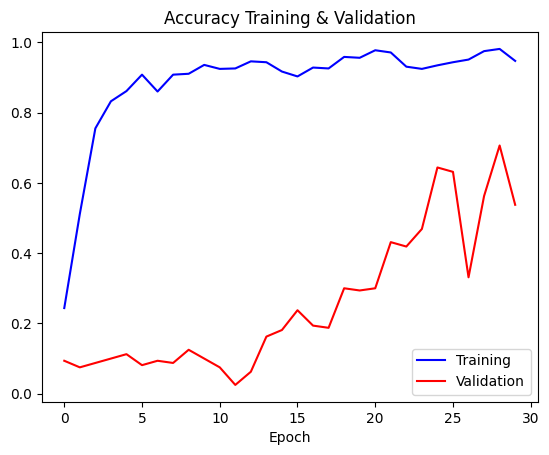

In [27]:
plt.plot(history.history['accuracy'], label='Training', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation', color='red')
plt.title('Accuracy Training & Validation')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

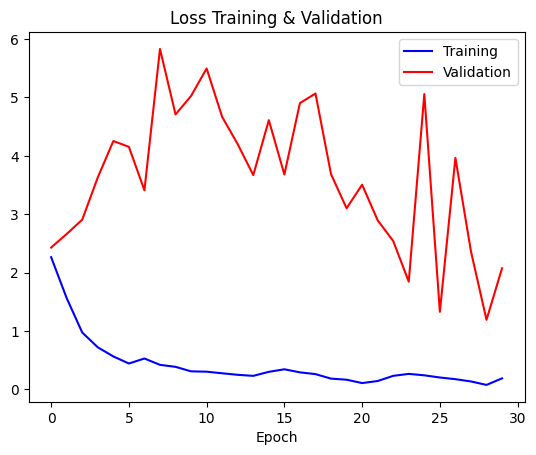

In [28]:
plt.plot(history.history['loss'], label='Training', color='blue')
plt.plot(history.history['val_loss'], label='Validation', color='red')
plt.title('Loss Training & Validation')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

In [29]:
test_score = model.evaluate_generator( validasi_generator)
print("[INFO] accuracy validasi: {:.2f}%".format(test_score[1] * 100))
print("[INFO] Loss validasi: ",test_score[0])

<ipython-input-29-9cfe226e1a3d>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_score = model.evaluate_generator( validasi_generator)


[INFO] accuracy validasi: 52.08%
[INFO] Loss validasi:  2.2880523204803467


In [30]:
test_score = model.evaluate_generator( training_generator)
print("[INFO] accuracy training: {:.2f}%".format(test_score[1] * 100))
print("[INFO] Loss training: ",test_score[0])

<ipython-input-30-266dc9ec93c8>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_score = model.evaluate_generator( training_generator)


[INFO] accuracy training: 50.51%
[INFO] Loss training:  2.637044668197632


In [34]:
from keras.applications.xception import Xception
model_excpetion = tf.keras.models.Sequential([
    Xception(weights=None,include_top=False,input_tensor=Input(shape=(300,300,3))),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(11, activation='softmax')
])


In [36]:
model_excpetion.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 dropout_1 (Dropout)         (None, 10, 10, 2048)      0         
                                                                 
 flatten_1 (Flatten)         (None, 204800)            0         
                                                                 
 dense_5 (Dense)             (None, 512)               104858112 
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 32)                8224      
                                                                 
 batch_normalization_111 (Ba  (None, 32)              

In [38]:
class CNNCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.85 and logs.get('val_accuracy')>0.85):
      print("\nAkurasi di atas 85%, hentikan training nya Sekarang yaaa!")
      self.model.stop_training = True

callbacks = CNNCallback()

# compile model dengan 'adam' optimizer loss function 'categorical_crossentropy' 
model_excpetion.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

# melakukan pelatihan model. 
history = model_excpetion.fit(training_generator,
                              steps_per_epoch=25,
                              validation_data=validasi_generator,
                              validation_steps=5,
                              epochs=30,
                              verbose=2,
                              callbacks =[callbacks])

Epoch 1/30
25/25 - 225s - loss: 1.6541 - accuracy: 0.5505 - val_loss: 2.9916 - val_accuracy: 0.0688 - 225s/epoch - 9s/step
Epoch 2/30
25/25 - 189s - loss: 1.1014 - accuracy: 0.7727 - val_loss: 3.8610 - val_accuracy: 0.0750 - 189s/epoch - 8s/step
Epoch 3/30
25/25 - 191s - loss: 0.8055 - accuracy: 0.8813 - val_loss: 4.4921 - val_accuracy: 0.0875 - 191s/epoch - 8s/step
Epoch 4/30
25/25 - 196s - loss: 0.6324 - accuracy: 0.9192 - val_loss: 4.8684 - val_accuracy: 0.1063 - 196s/epoch - 8s/step
Epoch 5/30
25/25 - 191s - loss: 0.5463 - accuracy: 0.9293 - val_loss: 5.2630 - val_accuracy: 0.0625 - 191s/epoch - 8s/step
Epoch 6/30
25/25 - 201s - loss: 0.4717 - accuracy: 0.9331 - val_loss: 4.7587 - val_accuracy: 0.1063 - 201s/epoch - 8s/step
Epoch 7/30
25/25 - 185s - loss: 0.4940 - accuracy: 0.9192 - val_loss: 4.9830 - val_accuracy: 0.0500 - 185s/epoch - 7s/step
Epoch 8/30
25/25 - 196s - loss: 0.4181 - accuracy: 0.9242 - val_loss: 4.5592 - val_accuracy: 0.0938 - 196s/epoch - 8s/step
Epoch 9/30
25/25

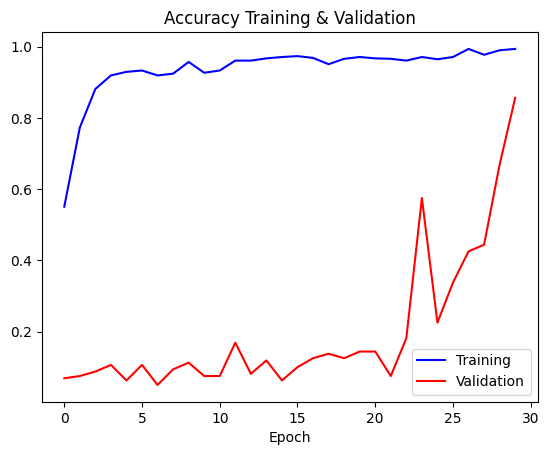

In [41]:
plt.plot(history.history['accuracy'], label='Training', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation', color='red')
plt.title('Accuracy Training & Validation')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

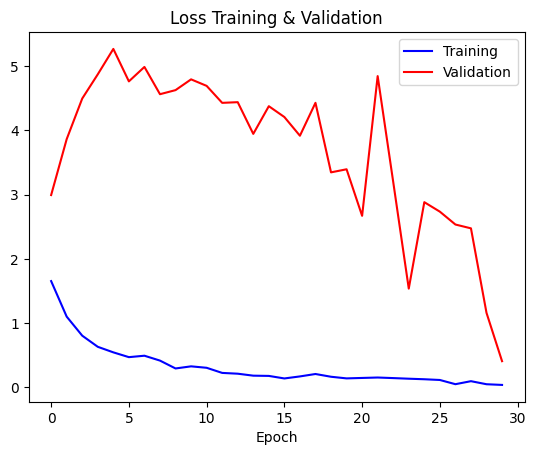

In [42]:
plt.plot(history.history['loss'], label='Training', color='blue')
plt.plot(history.history['val_loss'], label='Validation', color='red')
plt.title('Loss Training & Validation')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

In [39]:
test_score = model_excpetion.evaluate_generator( validasi_generator)
print("[INFO] accuracy validasi: {:.2f}%".format(test_score[1] * 100))
print("[INFO] Loss validasi: ",test_score[0])

<ipython-input-39-c9b5cff50de9>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_score = model_excpetion.evaluate_generator( validasi_generator)


[INFO] accuracy validasi: 85.80%
[INFO] Loss validasi:  0.45111995935440063


In [40]:
test_score = model_excpetion.evaluate_generator( training_generator)
print("[INFO] accuracy training: {:.2f}%".format(test_score[1] * 100))
print("[INFO] Loss training: ",test_score[0])

<ipython-input-40-310715cced50>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_score = model_excpetion.evaluate_generator( training_generator)


[INFO] accuracy training: 91.54%
[INFO] Loss training:  0.31048721075057983
